In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical


In [22]:
# Load the Reuters dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

# num_words=10000 restricts the vocabulary size to the top 10,000 most common words


In [25]:
import pandas as pd
pd.value_counts(y_test)

C:\Users\rishi\AppData\Local\Temp\ipykernel_19740\2132351568.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_test)


3     813
4     474
19    133
1     105
16     99
11     83
20     70
8      38
13     37
25     31
10     30
21     27
9      25
2      20
18     20
24     19
6      14
31     13
12     13
0      12
30     12
23     12
17     12
36     11
40     10
28     10
32     10
15      9
41      8
26      8
22      7
34      7
35      6
43      6
5       5
44      5
33      5
39      5
27      4
29      4
38      3
42      3
7       3
37      2
14      2
45      1
Name: count, dtype: int64

In [11]:
# Convert the integer sequences back into binary matrices
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

# Convert class vectors to binary class matrices (one-hot encoding)
num_classes = np.max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [12]:
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │       5,120,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 46)                  │          23,598 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 46)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,144,110 (19.62 MB)

 Trainable params: 5,144,110 (19.62 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
batch_size = 32
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)


Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9701 - loss: 0.0829 - val_accuracy: 0.7709 - val_loss: 4.7295
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9659 - loss: 0.0792 - val_accuracy: 0.7675 - val_loss: 4.6459
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9671 - loss: 0.0730 - val_accuracy: 0.7620 - val_loss: 4.6504
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9695 - loss: 0.0713 - val_accuracy: 0.7620 - val_loss: 4.8636
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9663 - loss: 0.0722 - val_accuracy: 0.7653 - val_loss: 4.8580
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9680 - loss: 0.0729 - val_accuracy: 0.7664 - val_loss: 5.0110
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9695 - loss: 0.0714 - val_accuracy: 0.7653 - val_loss: 5.0202
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9617 - loss: 0.0747 - val_accu

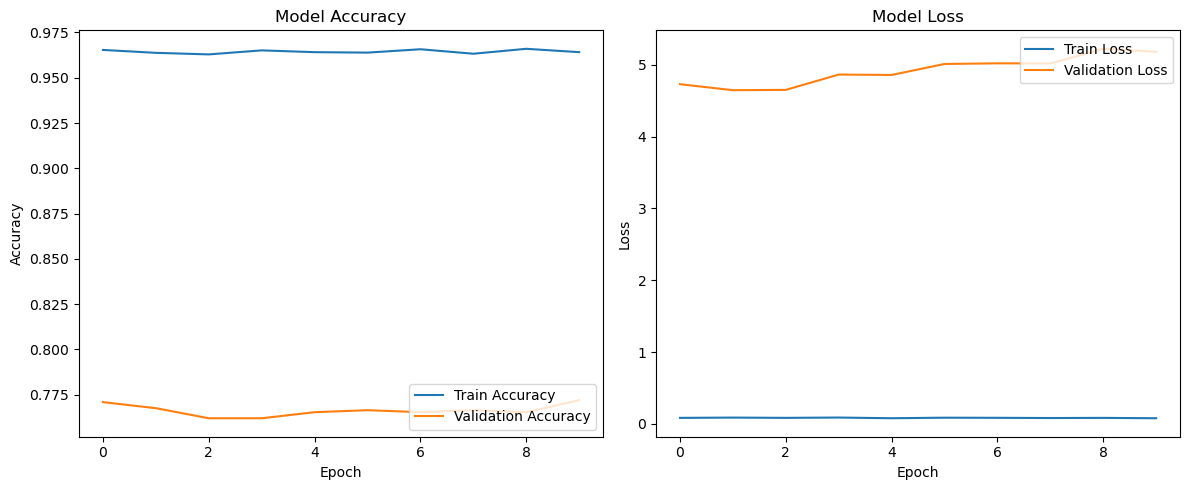

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


In [20]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print(f"Test accuracy: {score[1]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7772 - loss: 4.4283
Test accuracy: 0.7707034945487976
